In [3]:
import cv2
import matplotlib.pyplot as plt

In [4]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt' # configuration file
frozen_model = 'frozen_inference_graph.pb' # model

In [5]:
model = cv2.dnn_DetectionModel(frozen_model, config_file) # loaded model in memory

In [6]:
classLabels = [] # List of class Labels
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [7]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [8]:
model.setInputSize(320,320) # input configuration file defined this as the input size
model.setInputScale(1.0/127.5) # 255(all gray levels)/2
model.setInputMean((127.5,127.5,127.5)) # mobilenet=>[-1, 1]
model.setInputSwapRB(True) # input in RGB format to model

<dnn_Model 0x7f9bb0cb1b90>

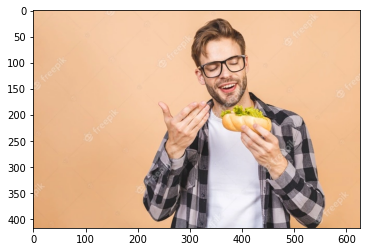

In [9]:
# Read an image
img = cv2.imread('../Images/man_eating_sandwhich_3.webp')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # bgr format by default so convert to rgb format

In [17]:
def Person_count(ClassesPresent, ClassLabels): # Returns person present given ClassIndex present and all class labels
    Person_present = 0
    if len(ClassesPresent) == 0:
        return Person_present
    else: # Some classes are present
        for idx in ClassesPresent:
            if ClassLabels[idx-1] == 'person':
                Person_present = Person_present + 1
            else:
                pass
    return Person_present

In [15]:
# Giving input to the Mobilenet Model for detecting objects in the frame(or picture)
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.2) # returns those classes which have higher 
                    # 50% confidence

# Printing Result

# which all classes present in the frame ?
for idx in ClassIndex:
    print(f'This class is present if frame:- {classLabels[idx-1]}')

This class is present if frame:- person
This class is present if frame:- carrot
This class is present if frame:- sofa
This class is present if frame:- carrot
This class is present if frame:- carrot
This class is present if frame:- skateboard
This class is present if frame:- carrot
This class is present if frame:- pizza
This class is present if frame:- carrot
This class is present if frame:- skis


In [18]:
Person_count(ClassIndex, classLabels)

1

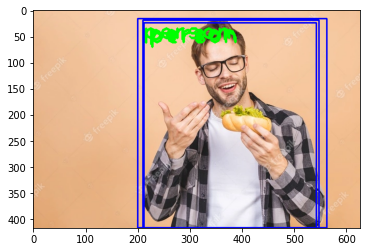

In [13]:
# Giving input to the Mobilenet Model for detecting objects in the frame(or picture)
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.6)

# Going through each of the detected class in the given frame by flattening the ClassIndex and working Class by class
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox): # bbox for bounding box
    cv2.rectangle(img, boxes,(255,0,0), 2) # A red color box of width 2 over img frame
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=3)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # overwrite detected class over the frame
cv2.destroyAllWindows()

In [11]:
import cv2
import datetime
import imutils

cap = cv2.VideoCapture('../videos/street_video.mp4')

fps_start_time = datetime.datetime.now()
fps = 0
total_frames = 0
#ret=True

while True:
    re,frame = cap.read()
    frame = imutils.resize(frame, width=800)
    total_frames+= 1

    fps_end_time = datetime.datetime.now()
    time_diff = fps_end_time - fps_start_time
    if time_diff.seconds == 0:
        fps = 0.0
    else:
        fps = (total_frames / time_diff.seconds)

    fps_text = "FPS: {:.2f}".format(fps)

    cv2.putText(frame, fps_text, (5, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 1)

    cv2.imshow("Application", frame)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break

cv2.destroyAllWindows()

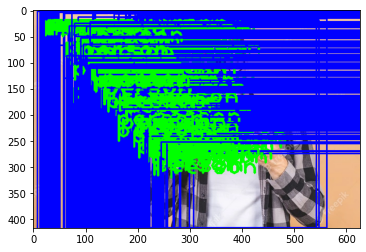

In [15]:
# Video Processing frame by frame
cap = cv2.VideoCapture('../videos/street_video.mp4')

# check if video is opened correctly
if cap.isOpened():
    cap = cv2.VideoCapture(0)
else:
    raise IOError('Cannot open Video')
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.6)
    cv2.imshow('Object Detection using MobileNet SSD', frame)
    if(len(ClassIndex) != 0): # some class is present
        # loop through all the classes detected in a frame
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox): # bbox for bounding box
            cv2.rectangle(frame, boxes,(255,0,0), 2) # A red color box of width 2 over img frame
            cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=3)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # overwrite detected class over the frame
    else:
        continue # move to next frame
        
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break # press q button for quit
        
cap.release() # release captured video
cv2.destroyAllWindows() # close all windows